In [1]:
#import warnings
import sys 

import pickle

sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.visualization.tcav_visual import plot_results

In [2]:
PATH = '/work3/s174498/nlp_tcav_results/'
target = 'positive'
results = '_gender_layer_droput_5_sensitivities'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

got that data


/work3/s174498/nlp_tcav_results/figures/gender_concepts/
concept intersex
concept man
concept transsexual
concept woman


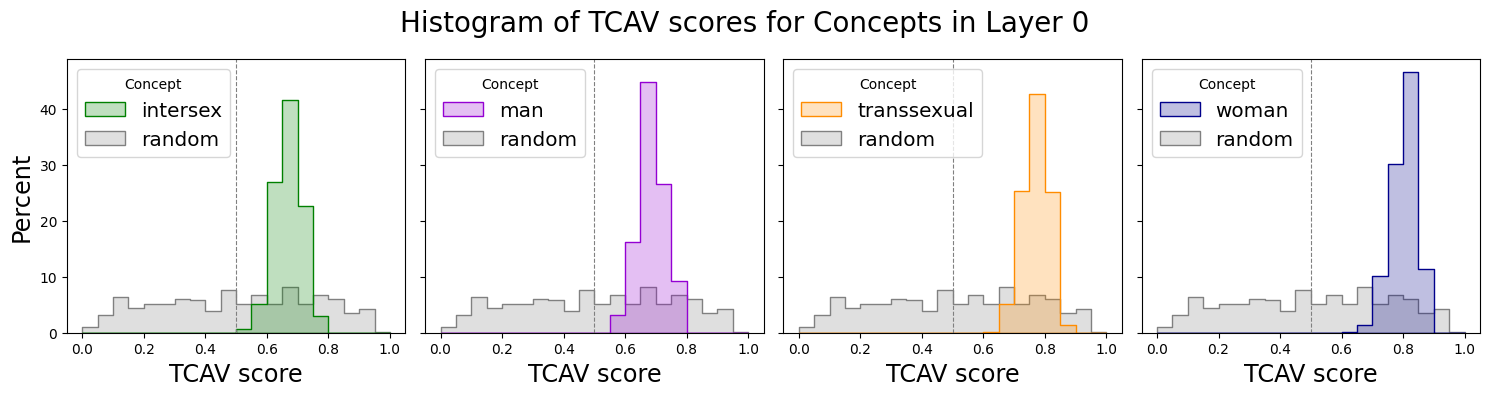

{'random_p-value': [0.50398, 0.2490639445782727], 'bn_vals': [0.6707333333333334, 0.6857533333333333, 0.7699866666666667, 0.8029666666666667], 'bn_stds': [0.04439114025718796, 0.04493982692940021, 0.041899878546628536, 0.0427376882856338], 'significant': [True, True, True, True], 'p-value': [1.492510107019491e-44, 1.0395148639144637e-51, 1.0038803493275676e-97, 4.0773883139267984e-117], 'concept': ['intersex', 'man', 'transsexual', 'woman']}
num concepts 4
bn roberta.encoder.layer.5.output.dropout


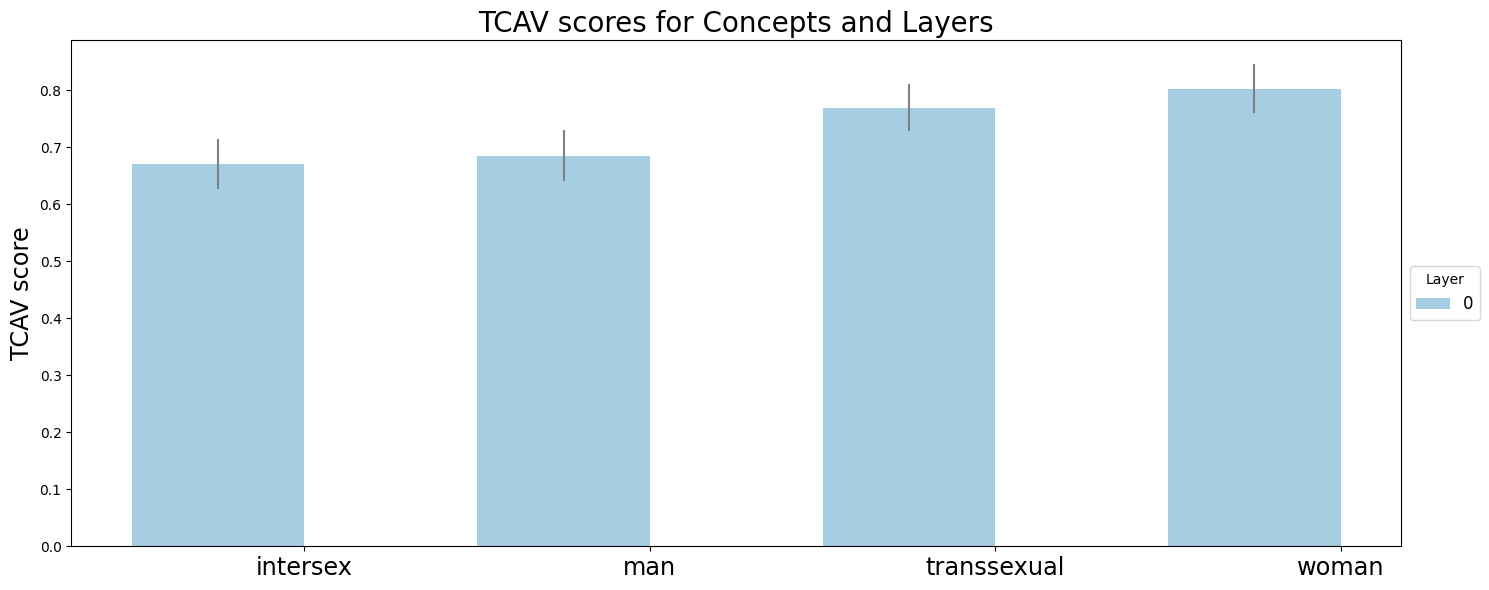

In [3]:
# comcepts 
# ['hate','irony','offensive'] 
# ['intersex','man','transsexual','woman']
# ['news','world','sport','business','science']
concepts = ['intersex','man','transsexual','woman']# ['woman']#  ['news','world','sport','business','science']#
PATH =  '/work3/s174498/nlp_tcav_results/figures/gender_concepts/'
output = plot_results(data, target, concepts ,PATH, plot_hist = True, save_fig =False, t_test_mean = None)

In [21]:
PATH = '/work3/s174498/nlp_tcav_results/'

with open(PATH+'positive_woman_layer_0_11.pkl','rb') as handle:
    data = pickle.load(handle)

In [22]:
import numpy as np 
np.mean(data['positive']['woman']['roberta.encoder.layer.11.output.dense']['TCAV'])

0.0009599999999999999

In [23]:
np.mean(data['positive']['random']['roberta.encoder.layer.11.output.dense']['TCAV'])

0.5085333333333334

(array([222.,   9.,   5.,   8.,   1.,   6.,   3.,   5.,   9., 232.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

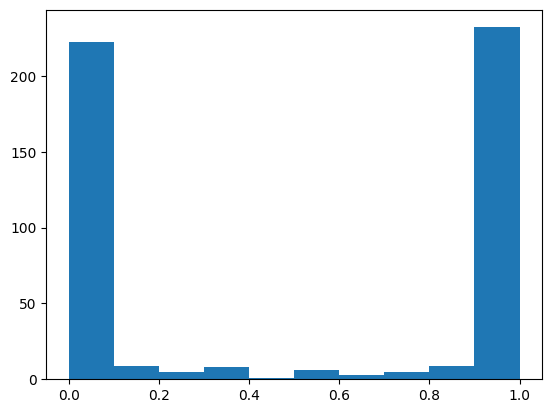

In [24]:
import matplotlib.pyplot as plt


plt.hist(data['positive']['random']['roberta.encoder.layer.11.output.dense']['TCAV'])

In [17]:
max(data['positive']['random']['roberta.encoder.layer.11.output.dense']['TCAV'])

0.5

### Something with sensitivity 

In [33]:
PATH = '/work3/s174498/nlp_tcav_results/'

with open(PATH+'positive_woman_layer_0_11_sensitivities.pkl','rb') as handle:
    data = pickle.load(handle)
random = data['positive']['random']
data = data['positive']['woman']


In [17]:
import matplotlib.pyplot as plt
import numpy as np

(array([  180.,   572.,  2279.,  8553., 25707., 41430., 46614., 21699.,
         2601.,   365.]),
 array([-0.36325216, -0.32457415, -0.28589613, -0.24721812, -0.2085401 ,
        -0.16986208, -0.13118407, -0.09250605, -0.05382804, -0.01515002,
         0.023528  ]),
 <BarContainer object of 10 artists>)

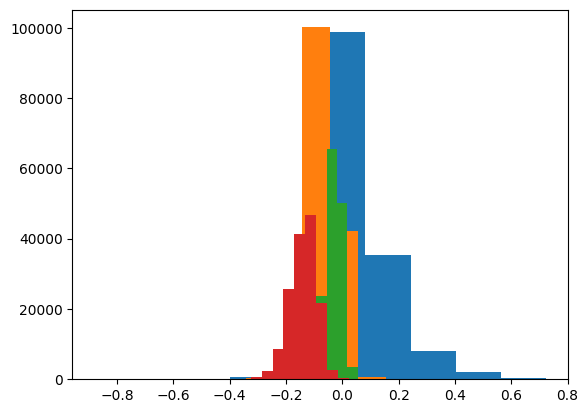

In [27]:
sens_0 = np.reshape(data['roberta.encoder.layer.0.output.dense']['sensitivity'],-1)
plt.hist(sens_0)
#sens_11 = np.reshape(data['roberta.encoder.layer.11.output.dense']['sensitivity'],-1)
#plt.hist(sens_11)
sens_9 = np.reshape(data['roberta.encoder.layer.9.output.dense']['sensitivity'],-1)
plt.hist(sens_9)
sens_10 = np.reshape(data['roberta.encoder.layer.10.output.dense']['sensitivity'],-1)
plt.hist(sens_10)


sens_11 = np.reshape(data['roberta.encoder.layer.11.output.dense']['sensitivity'],-1)
plt.hist(sens_11)



(array([  443.,  1232.,  9494., 27059., 44833., 39691., 19212.,  5076.,
         2655.,   305.]),
 array([-0.32965772, -0.26162576, -0.19359381, -0.12556185, -0.0575299 ,
         0.01050205,  0.07853401,  0.14656596,  0.21459791,  0.28262987,
         0.35066182]),
 <BarContainer object of 10 artists>)

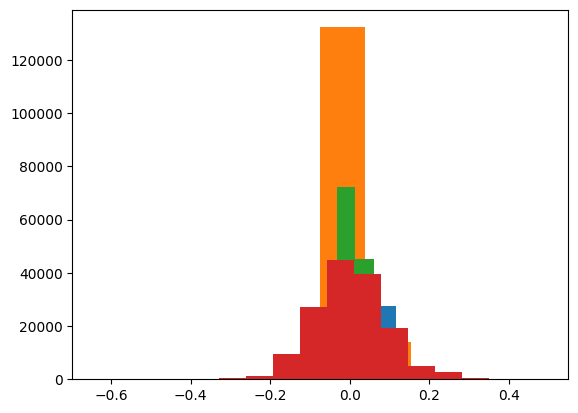

In [29]:
sens_0 = np.reshape(random['roberta.encoder.layer.0.output.dense']['sensitivities'],-1)
plt.hist(sens_0)
#sens_11 = np.reshape(data['roberta.encoder.layer.11.output.dense']['sensitivities'],-1)
#plt.hist(sens_11)
sens_9 = np.reshape(random['roberta.encoder.layer.9.output.dense']['sensitivities'],-1)
plt.hist(sens_9)
sens_10 = np.reshape(random['roberta.encoder.layer.10.output.dense']['sensitivities'],-1)
plt.hist(sens_10)


sens_11 = np.reshape(random['roberta.encoder.layer.11.output.dense']['sensitivities'],-1)
plt.hist(sens_11)

In [82]:
import pandas as pd

df_random = pd.DataFrame(columns = ['Sensitivity','Bottleneck'])
for nr, bottleneck in enumerate(random): 
  df = pd.DataFrame(np.reshape(random[bottleneck]['sensitivities'],-1),columns=['Sensitivity'])
  df['Bottleneck'] = str(nr)
  df_random = pd.concat([df_random, df], ignore_index=True)

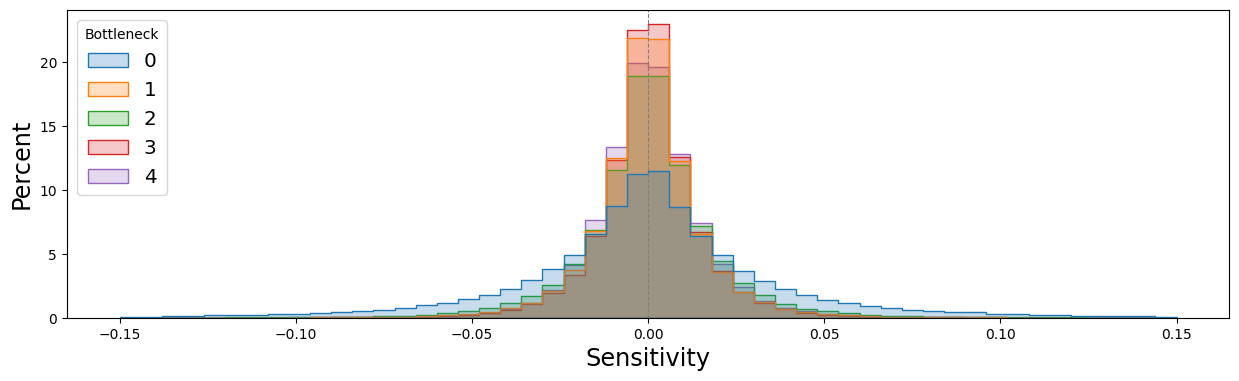

In [87]:
import seaborn as sns
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['0','1','2','3','4'],
hue="Bottleneck", stat = 'percent', binrange = (-0.15,0.15),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

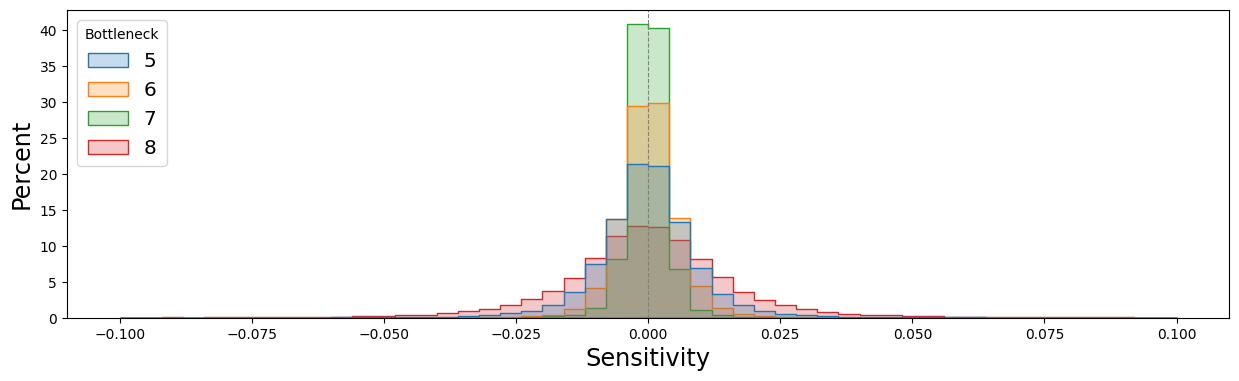

In [86]:
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['5','6','7','8'],
hue="Bottleneck", stat = 'percent', binrange = (-0.1,0.1),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

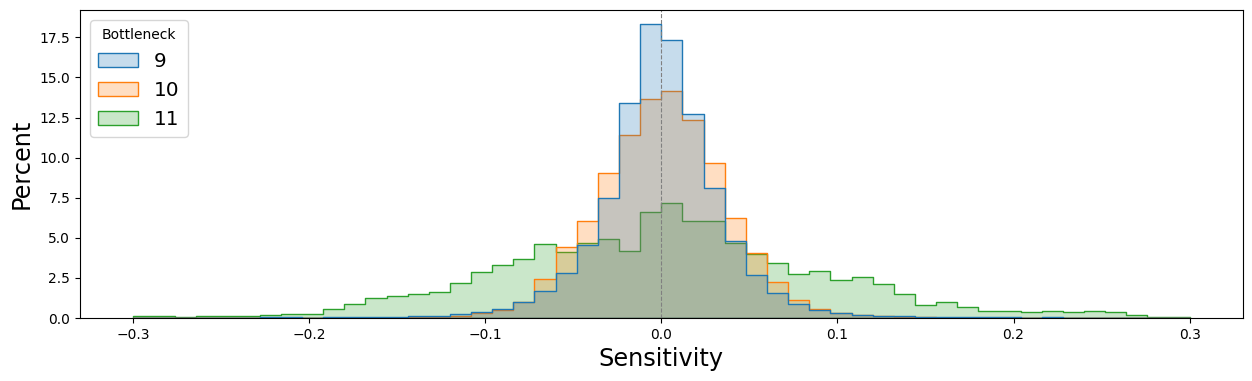

In [65]:
import seaborn as sns
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['9','10','11'],
hue="Bottleneck", stat = 'percent', binrange = (-0.3,0.3),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

In [81]:
import pandas as pd

df_random = pd.DataFrame(columns = ['Sensitivity','Bottleneck'])
for nr, bottleneck in enumerate(random): 
  df = pd.DataFrame(random[bottleneck]['sensitivities'].mean(axis = 1),columns=['Sensitivity'])
  df['Bottleneck'] = str(nr)
  df_random = pd.concat([df_random, df], ignore_index=True)

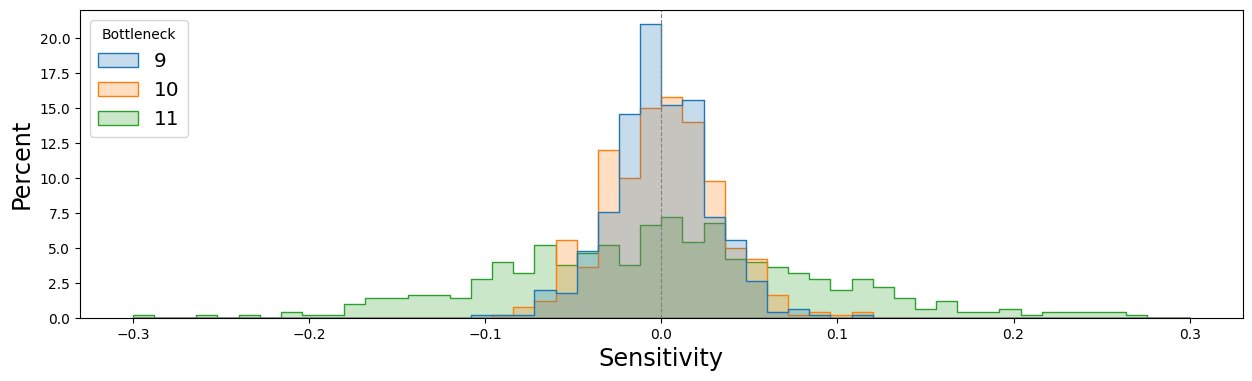

In [67]:
import seaborn as sns
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['9','10','11'],
hue="Bottleneck", stat = 'percent', binrange = (-0.3,0.3),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

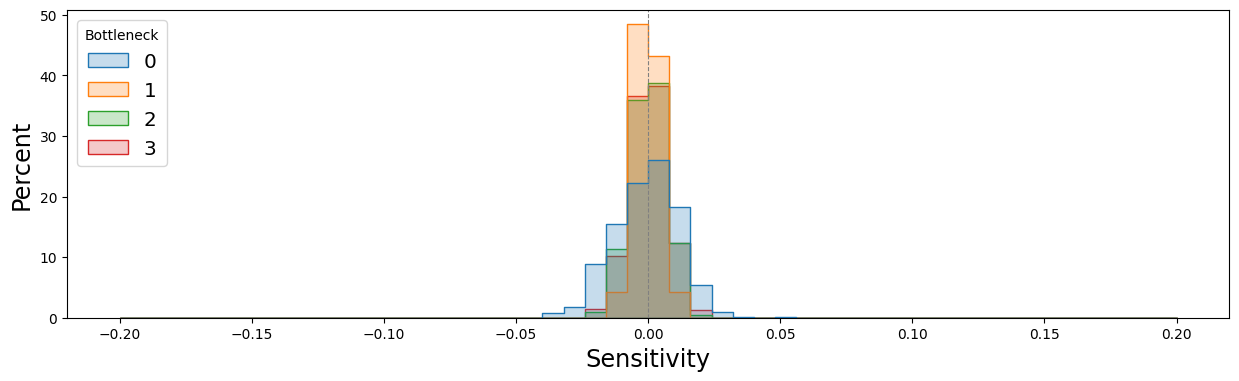

In [62]:
import seaborn as sns
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['0','1','2','3'],
hue="Bottleneck", stat = 'percent', binrange = (-0.2,0.2),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

## woman

In [91]:

df_woman = pd.DataFrame(columns = ['Sensitivity','Bottleneck'])
for nr, bottleneck in enumerate(random): 
  df = pd.DataFrame(np.reshape(data[bottleneck]['sensitivity'],-1),columns=['Sensitivity'])
  print(df.shape)
  df['Bottleneck'] = str(nr)
  df_woman = pd.concat([df_woman, df], ignore_index=True)

(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)


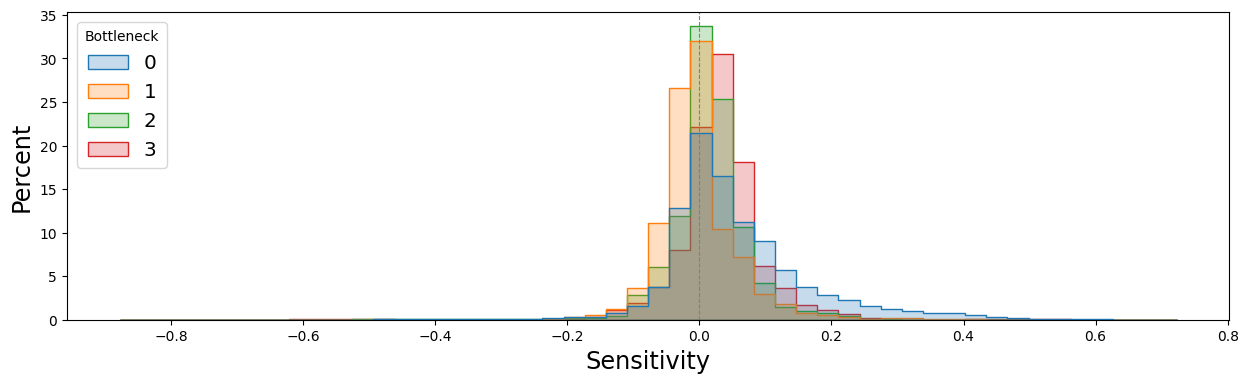

In [88]:

plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_woman, x="Sensitivity", hue_order =['0','1','2','3'],
hue="Bottleneck", stat = 'percent', common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

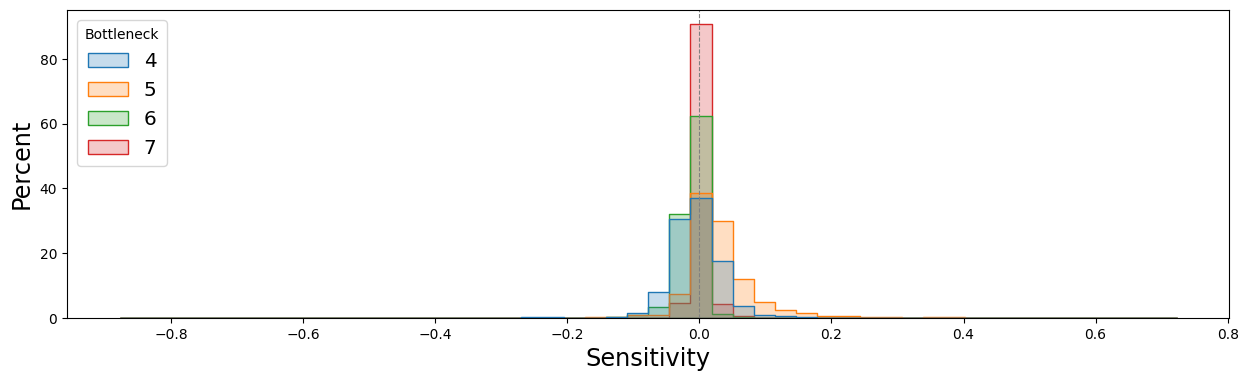

In [89]:
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_woman, x="Sensitivity", hue_order =['4','5','6','7'],
hue="Bottleneck", stat = 'percent', common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

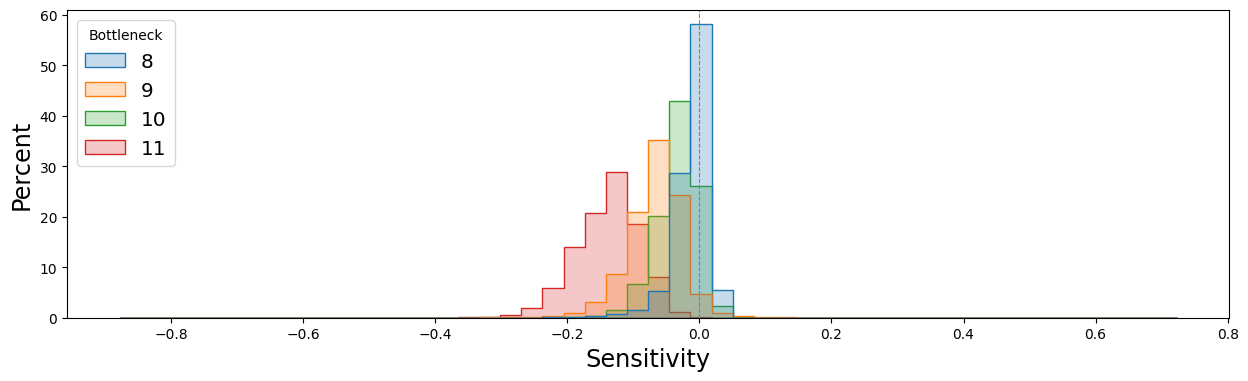

In [90]:
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_woman, x="Sensitivity", hue_order =['8','9','10','11'],
hue="Bottleneck", stat = 'percent',common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()